#### **Week 7 Assignment Draft**

**Area of FinTech**:  
Company Bankruptcy Prediction

**Dataset researched and located**:  
Kaggle.com : https://www.kaggle.com/fedesoriano/company-bankruptcy-prediction

**ML Use Case**:  
we are trying to make a model that predicts the bankruptcy of the startups. 

**ML model selected**:  
Random Forests and decision trees.

**Reason**: 
We choose this model to classify the factors that affects the bankruptcy of the startup companies and then we pass them through multiple decisions to train them and make predictions based on them.

**Group Name Finyouth: 

**Group Members**: 
1. Zainab Aldagdoug.
2. Nouf Almekawed.
3. Afnan Albaqami.
4. Khaloud Huraib.
5. Reem Alrashidy.


**Objective 1 & 2:**

In [1]:
# importing the packages needed
import pandas as pd
import numpy as np
import pydot as py
import graphviz
from sklearn.tree import export_graphviz
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
# Reading the data colledcted
df = pd.read_csv('data.csv')
data = df[['Bankrupt?',' Current Assets/Total Assets', ' Current Liabilities/Liability', ' Quick Assets/Total Assets', ' Tax rate (A)', ' Cash/Total Assets', ' Total Asset Turnover', ' ROA(A) before interest and % after tax']]

In [3]:
# Viewing the data
pd.set_option('display.max_columns',None)
data.head()

Bankrupt?   Current Assets/Total Assets   Current Liabilities/Liability  \
0          1                      0.190643                        0.676269   
1          1                      0.182419                        0.308589   
2          1                      0.602806                        0.446027   
3          1                      0.225815                        0.615848   
4          1                      0.358380                        0.975007   

    Quick Assets/Total Assets   Tax rate (A)   Cash/Total Assets  \
0                    0.166673            0.0            0.004094   
1                    0.127236            0.0            0.014948   
2                    0.340201            0.0            0.000991   
3                    0.161575            0.0            0.018851   
4                    0.260330            0.0            0.014161   

    Total Asset Turnover   ROA(A) before interest and % after tax  
0               0.086957                                 0.424389  
1               0.064468                                 0.538214  
2               0.014993                                 0.499019  
3               0.089955                                 0.451265  
4               0.175412                                 0.538432

In [4]:
# colunmes and rows count
data.shape

(6819, 8)

In [5]:
# Some information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 8 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Bankrupt?                                6819 non-null   int64  
 1    Current Assets/Total Assets             6819 non-null   float64
 2    Current Liabilities/Liability           6819 non-null   float64
 3    Quick Assets/Total Assets               6819 non-null   float64
 4    Tax rate (A)                            6819 non-null   float64
 5    Cash/Total Assets                       6819 non-null   float64
 6    Total Asset Turnover                    6819 non-null   float64
 7    ROA(A) before interest and % after tax  6819 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 426.3 KB


In [6]:
data['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [7]:
# Tell about nulls if any 
data.isnull().any()

Bankrupt?                                  False
 Current Assets/Total Assets               False
 Current Liabilities/Liability             False
 Quick Assets/Total Assets                 False
 Tax rate (A)                              False
 Cash/Total Assets                         False
 Total Asset Turnover                      False
 ROA(A) before interest and % after tax    False
dtype: bool

<AxesSubplot:>

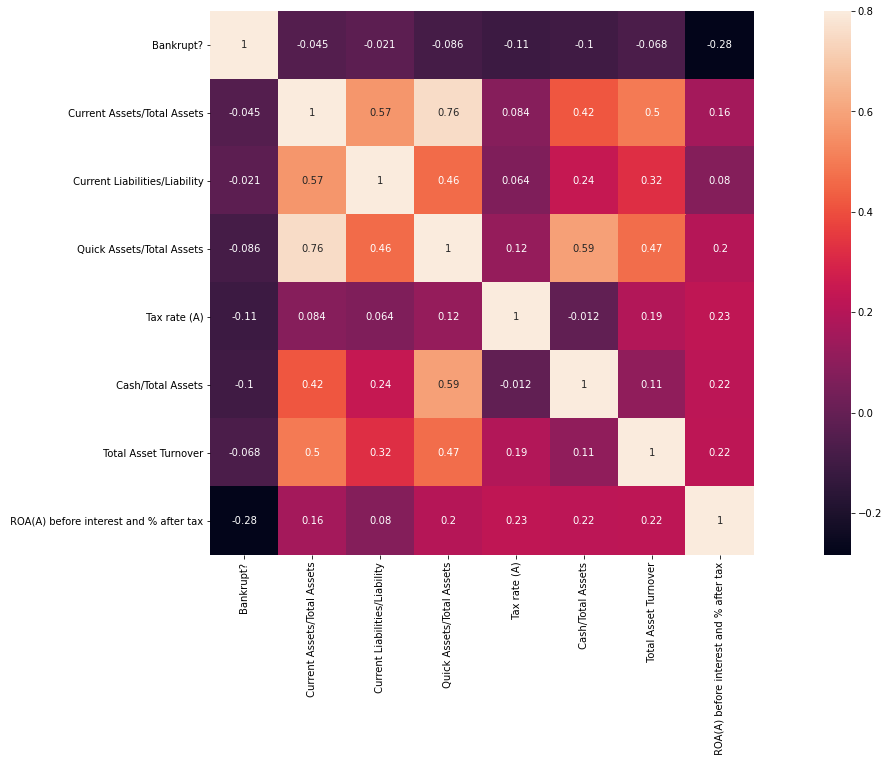

In [8]:
#find the correlation betweeen the variables 

corr = data.corr() 

fig = plt.figure(figsize=(25,10))

sns.heatmap(corr, vmax=.8, square=True,annot=True)

**Objective 3,4 & 5:**

In [9]:
#Bulding model 
x = data.drop('Bankrupt?', axis=1)
y = data['Bankrupt?']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [11]:
#training model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 60, criterion = 'entropy',random_state = 0)
rf.fit(x_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
rfa = accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))
print("Classification Report",classification_report(y_test,y_pred))

confusion matrix:
 [[1313    5]
 [  42    4]]
accuracy score =  0.9655425219941349
Classification Report               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1318
           1       0.44      0.09      0.15        46

    accuracy                           0.97      1364
   macro avg       0.71      0.54      0.56      1364
weighted avg       0.95      0.97      0.95      1364



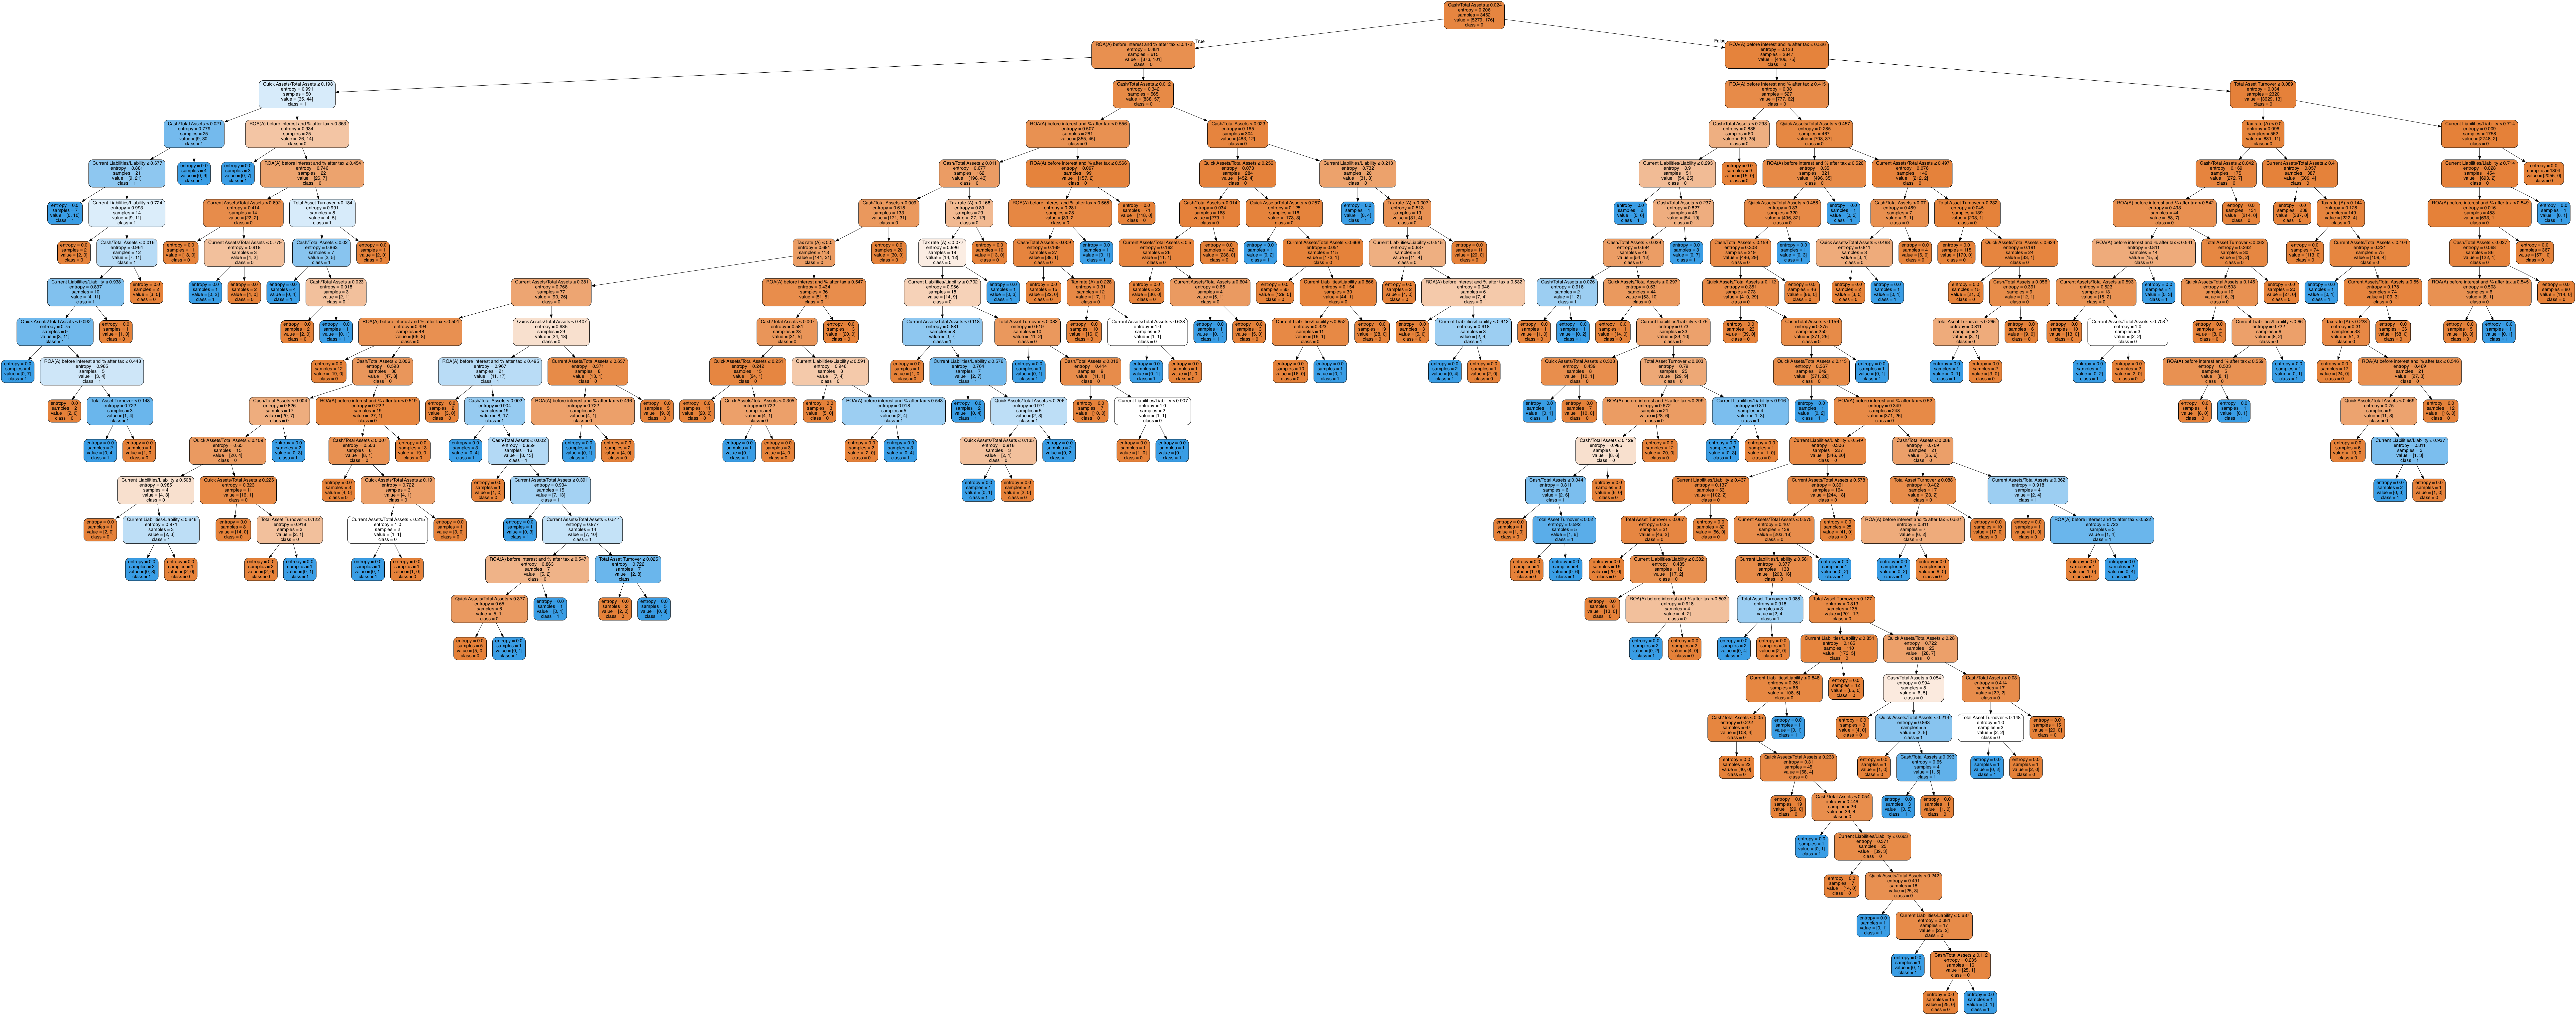

In [12]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

#Visualize graph
model_columns=x_train.columns
model_columns
estimator = rf.estimators_[5]


dot_data = StringIO()
export_graphviz(estimator, out_file= dot_data ,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = model_columns,
                class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('RandomForestClassifer_bankruptcy_entropy.png')
Image(graph.create_png())

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

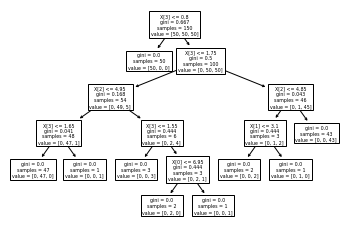

In [13]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
x, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y)
tree.plot_tree(clf)